In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


#### Importing Libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

## <font color='blue'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable.

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_json('/content/gdrive/MyDrive/Taller IV Ciencia de Datos/DataSet_Entrenamiento_v1.json')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes


#### After using the head function, we can see that this database has some null values (using the info function we can confirm this), our target variable is "Churn", we can also see that we have Numerical and Categoricals, here we can see too that we only have few variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6000 non-null   object 
 1   gender            6000 non-null   object 
 2   SeniorCitizen     6000 non-null   int64  
 3   Partner           6000 non-null   object 
 4   Dependents        6000 non-null   object 
 5   tenure            6000 non-null   int64  
 6   PhoneService      6000 non-null   object 
 7   MultipleLines     6000 non-null   object 
 8   InternetService   6000 non-null   object 
 9   OnlineSecurity    6000 non-null   object 
 10  OnlineBackup      6000 non-null   object 
 11  DeviceProtection  6000 non-null   object 
 12  TechSupport       6000 non-null   object 
 13  StreamingTV       6000 non-null   object 
 14  StreamingMovies   6000 non-null   object 
 15  Contract          6000 non-null   object 
 16  PaperlessBilling  6000 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6000.000000,6000.000000,6000.000000
mean,0.160167,32.320667,64.607233
std,0.366791,24.637296,30.195382
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.000000
50%,0.000000,29.000000,70.300000
75%,0.000000,56.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
(df.isnull().sum() / len(df)) * 100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.166667
Churn               0.000000
dtype: float64

## <font color='blue'> 2. Data Analysis. </font>

#### Verifying the correlation between our variables.

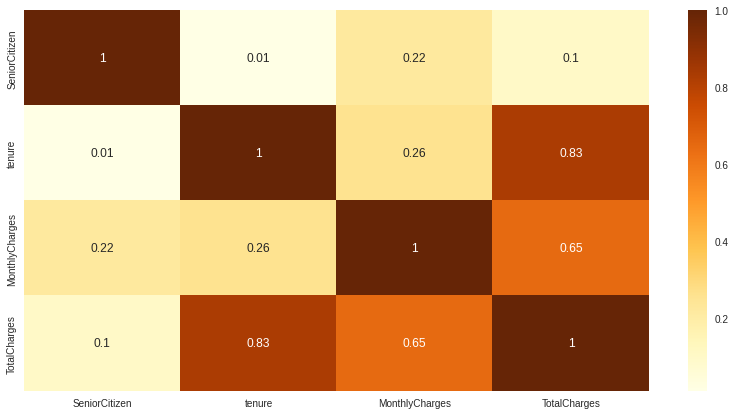

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

#### Here we can see that the Total_Charges variable has a strong correlation with the Tenure and MonthlyCharges variables, so let's take it out of our base.

In [ ]:
df = df.drop('TotalCharges', axis = 1)

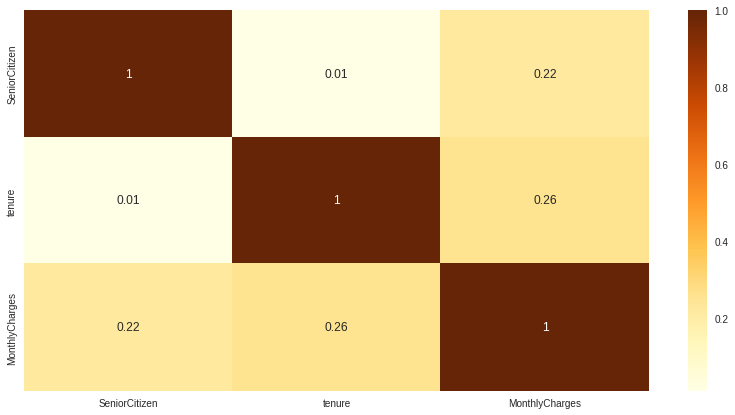

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

#### Categorical Variables

#### Looking at our categorical variables we can see that we have practically the same number of men and women, most of our data are from non-SeniorCitizen, the Partner variable is well distributed, most of our data are from non-dependents, most of the data have telephone service, and it is well divided between multiple lines and only one, when we look at the internet most use fiber optics, and do not have Online Security, Backup and Protection Device, when we look at support we see that most customers do not have this service, looking at the Steaming part, the customers who have and who don't have it are well distributed, when we look at the contract variable most contracts are monthly contracts, looking at the payment variable we can see that most payments are made from online, when we look at our target variable, we can see that we have more negative results than positive ones.

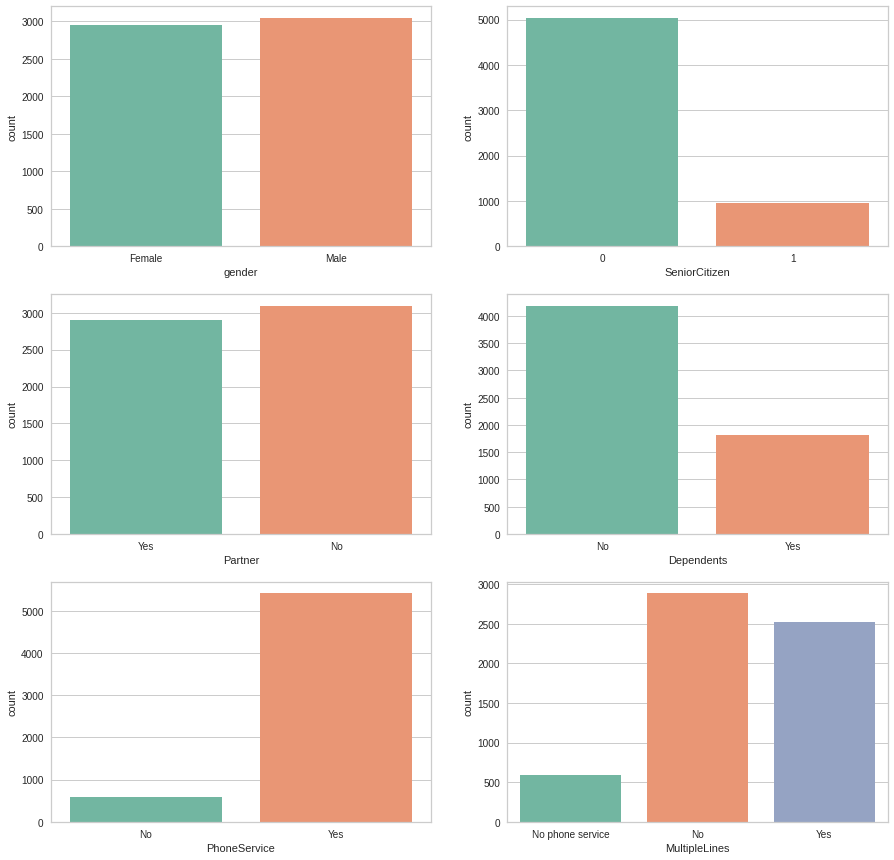

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'MultipleLines', palette = 'Set2', data = df)

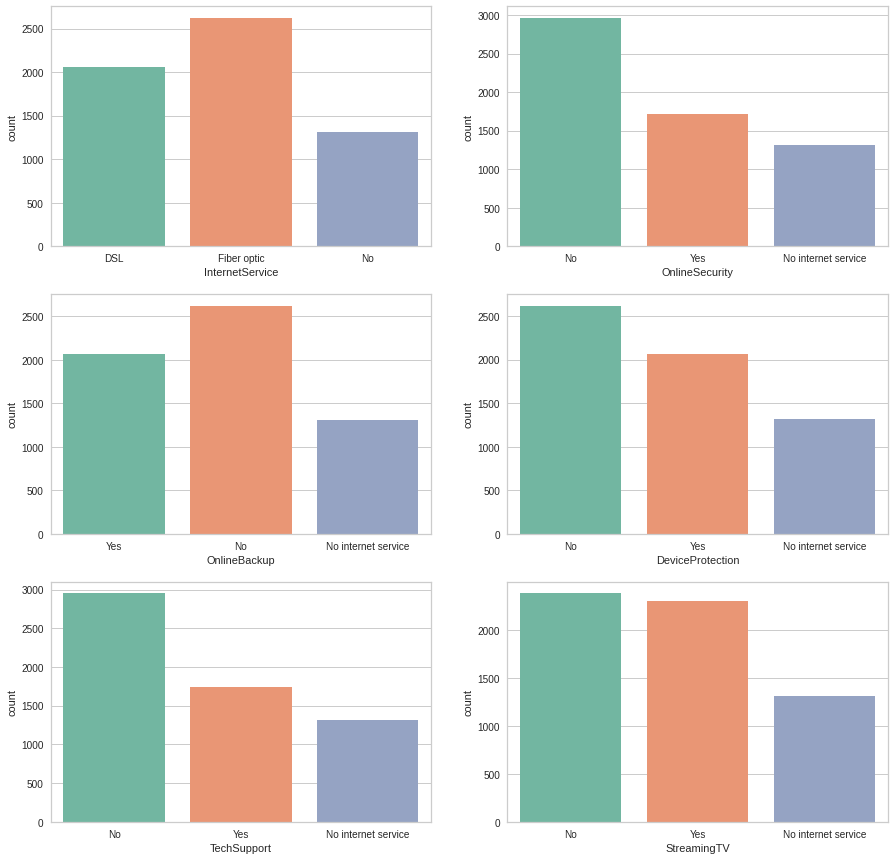

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'InternetService', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'OnlineSecurity', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'OnlineBackup', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'DeviceProtection', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'TechSupport', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'StreamingTV', palette = 'Set2', data = df)

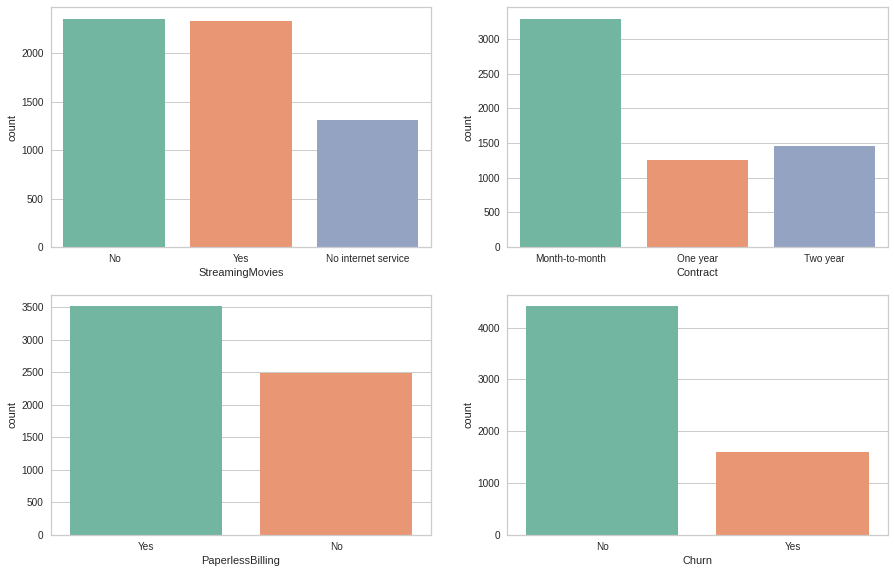

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'StreamingMovies', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Churn', palette = 'Set2', data = df)

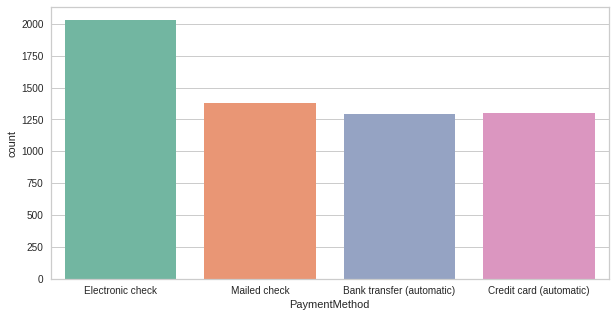

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'PaymentMethod', palette = 'Set2', data = df)

#### Continuous Variable

#### Looking at our continuous variables we can see a funny pattern in the Tenure variable, where the largest amounts of value are at the minimum and maximum of the variable, when we look at the MonthlyCharge variable we can see that the vast majority of customers pay very little, but it doesn't happen the phenomenon of the more expensive the smaller the number of samples, when we look at the boxplots we can see that we do not have outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


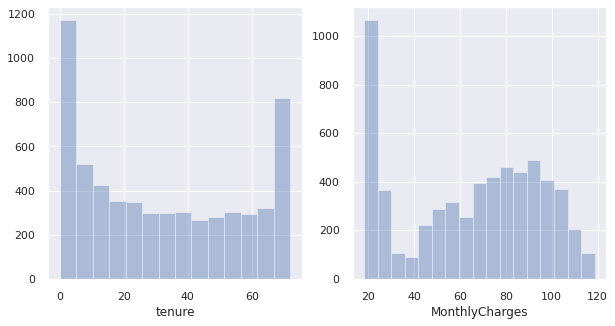

In [ ]:
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(df['tenure'], kde = False)

plt.subplot(1,2,2)
sns.distplot(df['MonthlyCharges'], kde = False)

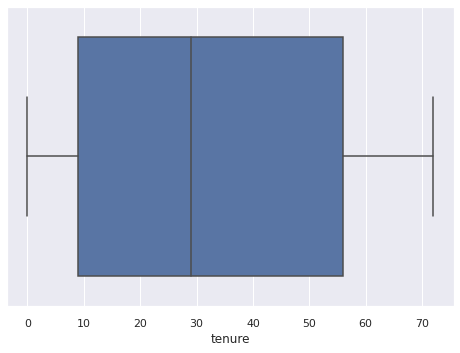

In [ ]:
sns.boxplot(x=df["tenure"])

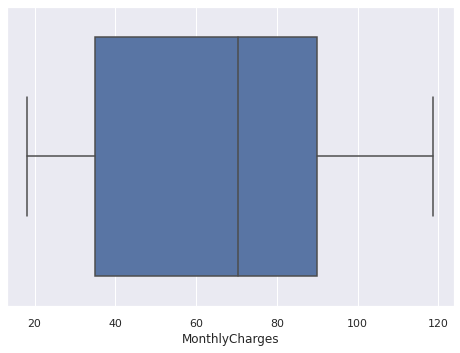

In [ ]:
sns.boxplot(x=df["MonthlyCharges"])

#### Bivariate Analysis

#### Comparing our Target variable with our categorical variables we were able to get some interesting insights, we could see some patterns in the SenorCitizen variables when the value is positive, in the InternetService variable when the value is Optical Fiber, in the Online Security variable when the value is no, in the Device variable Protection when the value is No, in the Online Backup variable when the value is no, in the Tech Support variable when the value is no and in the Contract variable when it is a monthly contract, when you meet these requirements it is usually a potential customer.

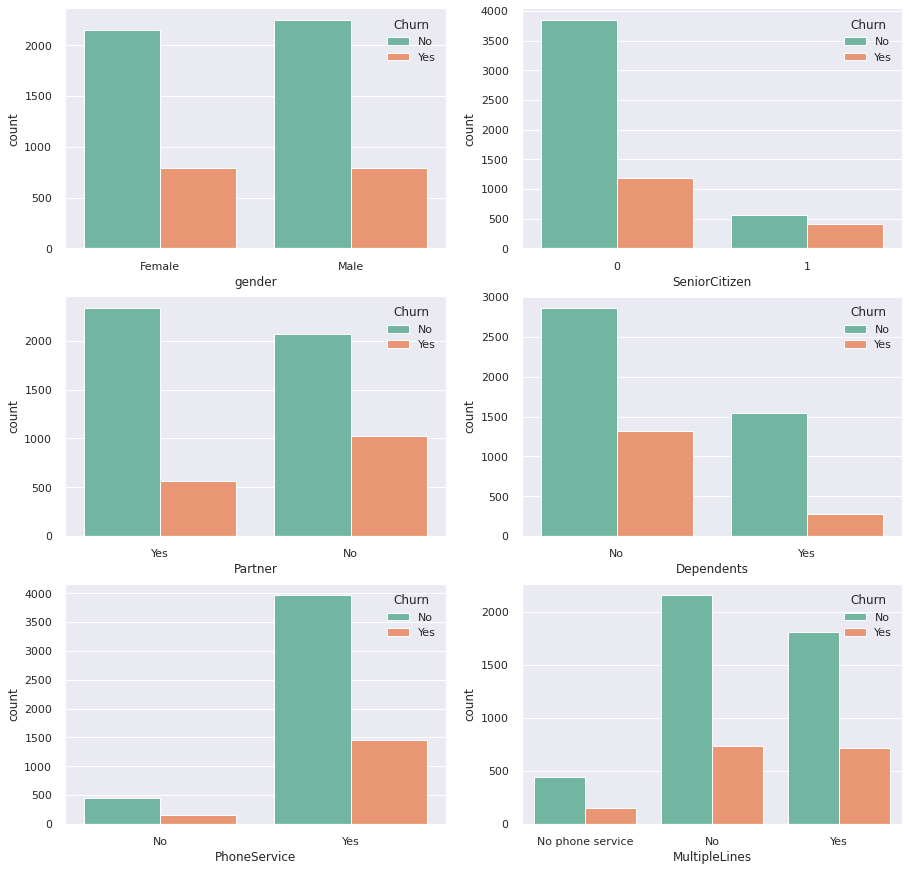

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'MultipleLines', hue = 'Churn', palette = 'Set2', data = df)

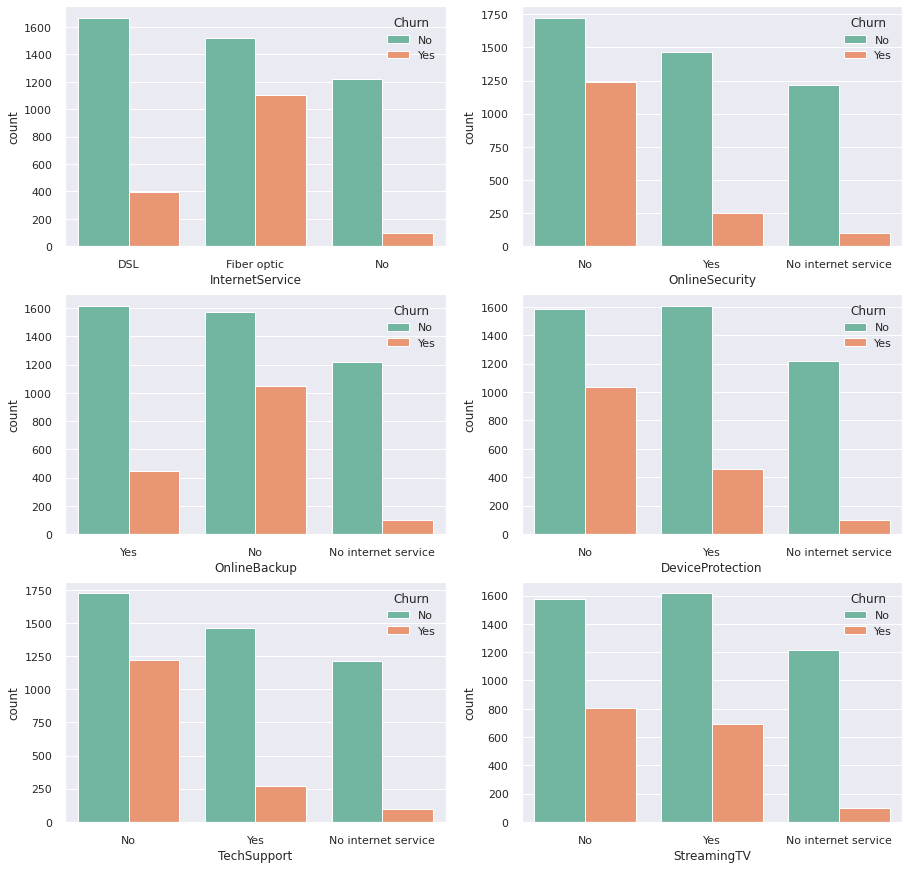

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'InternetService', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'OnlineBackup', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'DeviceProtection', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'TechSupport', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'StreamingTV', hue = 'Churn', palette = 'Set2', data = df)

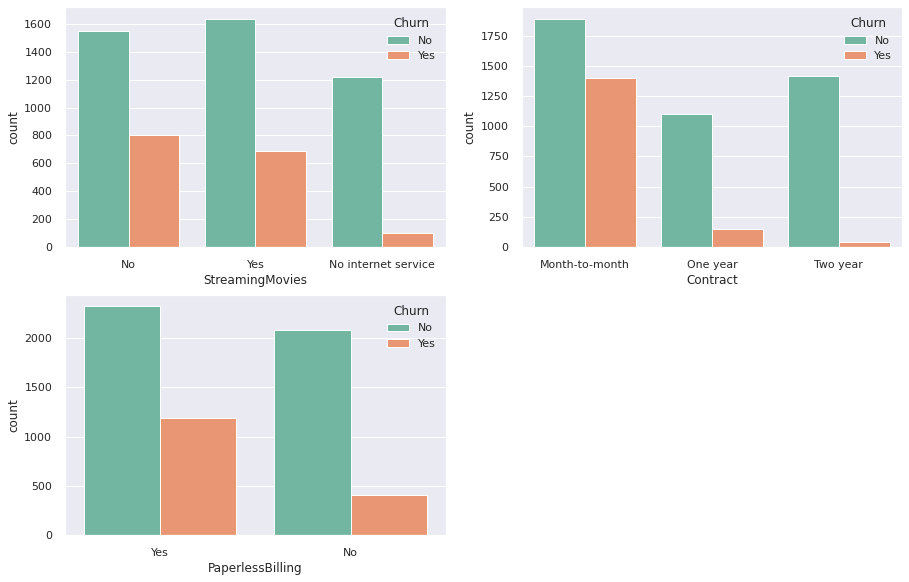

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'StreamingMovies', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract', hue = 'Churn', palette = 'Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', palette = 'Set2', data = df)

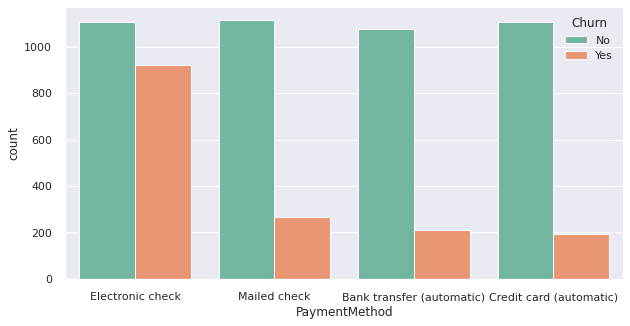

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'PaymentMethod', hue = 'Churn', palette = 'Set2', data = df)

#### When we analyze the Tenure variable, we can conclude that the lower values ​​are more likely to be a potential customer, it is a variable with a lot of distortion.

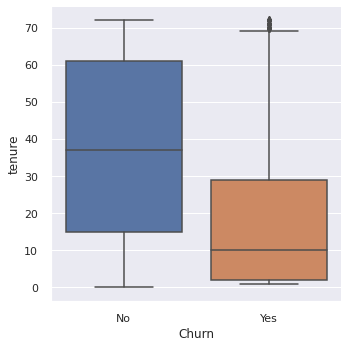

In [ ]:
sns.catplot(x = 'Churn', y="tenure", kind="box", data = df)

#### This MonthlyCharge variable is an interesting variable too, higher values ​​are more likely to have a positive result.

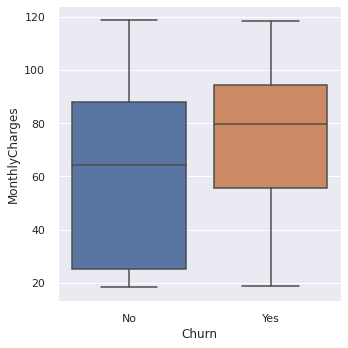

In [ ]:
sns.catplot(x = 'Churn', y="MonthlyCharges", kind="box", data = df)

#### When we compare the variable Tenure with the variable Monthly Charge we do not have any relationship.

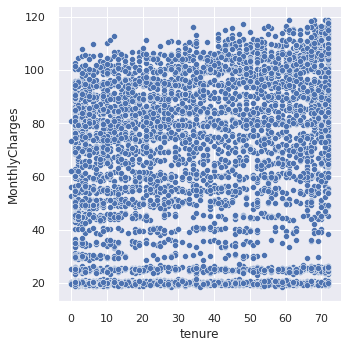

In [ ]:
sns.relplot(x='tenure', y = 'MonthlyCharges' , data = df)

## <font color='blue'> 3. Model Building. </font>

#### Here we will remove the customerID variable that will not be used

In [ ]:
df = df.drop('customerID', axis = 1)

#### Separating into features variables and target variable.

In [ ]:
X = df.drop('Churn', axis = 1)

In [ ]:
X = X.values

In [ ]:
y = df['Churn']

#### Balancing

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=0)

In [ ]:
X, y = ros.fit_resample(X, y)

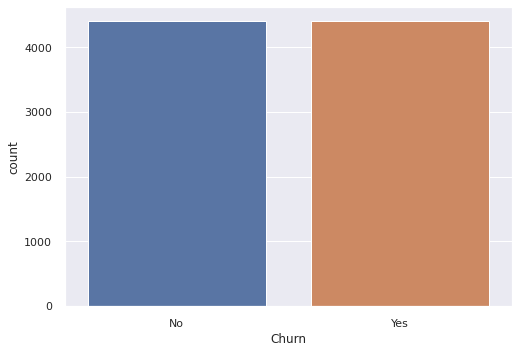

In [ ]:
ax = sns.countplot(x=y)

#### Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_gender = LabelEncoder()
label_encoder_Partner = LabelEncoder()
label_encoder_Dependentes = LabelEncoder()
label_encoder_PhoneService = LabelEncoder()
label_encoder_MultipleLines = LabelEncoder()
label_encoder_InternetService = LabelEncoder()
label_encoder_OnlineSecurity = LabelEncoder()
label_encoder_OnlineBackup = LabelEncoder()
label_encoder_DeviceProtection = LabelEncoder()
label_encoder_TechSupport = LabelEncoder()
label_encoder_StreamingTV = LabelEncoder()
label_encoder_StreamingMovies = LabelEncoder()
label_encoder_Contract = LabelEncoder()
label_encoder_PaperlessBilling = LabelEncoder()
label_encoder_PaymentMethod = LabelEncoder()

In [ ]:
X[:,0] = label_encoder_gender.fit_transform(X[:,0])
X[:,2] = label_encoder_Partner.fit_transform(X[:,2])
X[:,3] = label_encoder_Dependentes.fit_transform(X[:,3])
X[:,5] = label_encoder_PhoneService.fit_transform(X[:,5])
X[:,6] = label_encoder_MultipleLines.fit_transform(X[:,6])
X[:,7] = label_encoder_InternetService.fit_transform(X[:,7])
X[:,8] = label_encoder_OnlineSecurity.fit_transform(X[:,8])
X[:,9] = label_encoder_OnlineBackup.fit_transform(X[:,9])
X[:,10] = label_encoder_DeviceProtection.fit_transform(X[:,10])
X[:,11] = label_encoder_TechSupport.fit_transform(X[:,11])
X[:,12] = label_encoder_StreamingTV.fit_transform(X[:,12])
X[:,13] = label_encoder_StreamingMovies.fit_transform(X[:,13])
X[:,14] = label_encoder_Contract.fit_transform(X[:,14])
X[:,15] = label_encoder_PaperlessBilling.fit_transform(X[:,15])
X[:,16] = label_encoder_PaymentMethod.fit_transform(X[:,16])

#### We will run the models before scaling the data, after we will back here to run the StandardScaler and verify if we have best results using the scaling.

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, y_train.shape

((6171, 18), (6171,))

In [ ]:
X_test.shape, y_test.shape

((2645, 18), (2645,))

#### Naive Bayes

#### Running Gaussian Model.

#### Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
previsoes = naive_bayes.predict(X_test)

#### Normal Data

0.7440453686200378

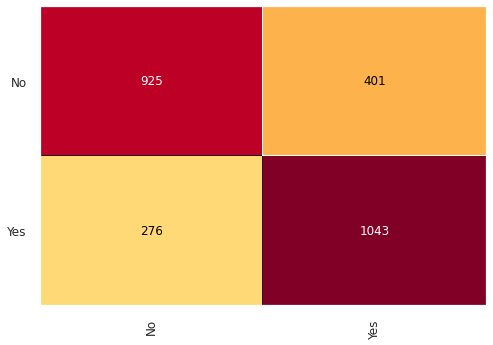

In [ ]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_naive_gaussian = (classification_report(y_test, previsoes))

In [ ]:
print(classification_naive_gaussian)

              precision    recall  f1-score   support

          No       0.77      0.70      0.73      1326
         Yes       0.72      0.79      0.75      1319

    accuracy                           0.74      2645
   macro avg       0.75      0.74      0.74      2645
weighted avg       0.75      0.74      0.74      2645



#### For the first model we had an interesting result, the model was able to learn when it is a lead but it did not have an optimal performance predicting when it is not, we had an accuracy of 75%

In [ ]:
score_naive_gaussian = 0.75426731078905

#### Decision Tree

#### Here we will use the Decision Tree Model, we will test Entropy and Gini calculations, using our Normal Data.

#### Applying GridSearch

#### Here we are applying GridSearch to check which are the best metrics to use.

In [ ]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [ ]:
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

#### Decision Tree - Normal Data

In [ ]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  11
Algorithm:  gini
Score:  0.7916051942598049


#### Running Decision Tree.

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=0)

In [ ]:
previsoes = decision_tree.predict(X_test)

#### Normal Data

0.8079395085066162

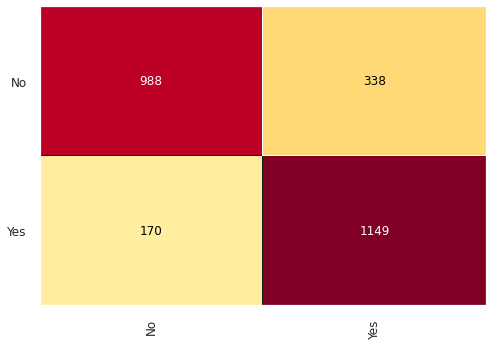

In [ ]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_decision = (classification_report(y_test, previsoes))

In [ ]:
print(classification_decision)

              precision    recall  f1-score   support

          No       0.85      0.75      0.80      1326
         Yes       0.77      0.87      0.82      1319

    accuracy                           0.81      2645
   macro avg       0.81      0.81      0.81      2645
weighted avg       0.81      0.81      0.81      2645



#### We had a good improvement compared to the Naive Bayes model, the model learned a lot when it is a lead and had a good result when it is not, an interesting model.

In [ ]:
score_tree = 0.7971014492753623

#### Checking the most important variables of the model

In [ ]:
columns = [['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges']]

In [ ]:
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)

In [ ]:
feature_imp

Contract            0.326737
MonthlyCharges      0.211264
tenure              0.163651
OnlineSecurity      0.051692
PaymentMethod       0.030459
PaperlessBilling    0.024899
gender              0.022389
InternetService     0.021939
OnlineBackup        0.019579
Dependents          0.018420
SeniorCitizen       0.018020
Partner             0.017727
StreamingMovies     0.016344
MultipleLines       0.015800
TechSupport         0.013628
StreamingTV         0.013218
DeviceProtection    0.008392
PhoneService        0.005845
dtype: float64

#### Random Forest

#### Here we will use the Random Forest Model, we will test Entropy and Gini calculations, using our Normal Data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### Applying GridSearch

In [ ]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

In [ ]:
model = RandomForestClassifier()

In [ ]:
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [ ]:
gridRandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [ ]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)

Algorithm:  gini
Score:  0.8590175788555043


#### Running Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
previsoes = random_forest.predict(X_test)

#### Normal Data

0.8744801512287335

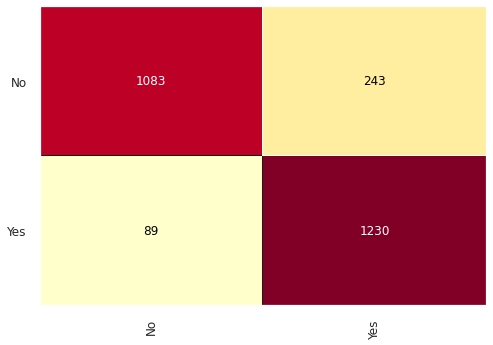

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_random = (classification_report(y_test, previsoes))

In [ ]:
print(classification_random)

              precision    recall  f1-score   support

          No       0.92      0.82      0.87      1326
         Yes       0.84      0.93      0.88      1319

    accuracy                           0.87      2645
   macro avg       0.88      0.87      0.87      2645
weighted avg       0.88      0.87      0.87      2645



#### Here we had a great model with almost 88% accuracy, it was able to predict both results.

In [ ]:
score_random = 0.8760064412238325

#### Checking the most important variables of the model

In [ ]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

In [ ]:
feature_imp_random

MonthlyCharges      0.220631
tenure              0.220454
Contract            0.111299
PaymentMethod       0.060633
TechSupport         0.050338
OnlineSecurity      0.048272
InternetService     0.033816
gender              0.031674
OnlineBackup        0.029298
PaperlessBilling    0.026949
Partner             0.026518
DeviceProtection    0.026382
MultipleLines       0.024702
Dependents          0.023425
SeniorCitizen       0.019859
StreamingMovies     0.019835
StreamingTV         0.019330
PhoneService        0.006585
dtype: float64

#### Extra Trees

#### Here we will use the Extra Trees Model, we will test Entropy and Gini calculations, using our Normal Data.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

#### Applying GridSearch

In [ ]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [ ]:
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [ ]:
print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  entropy
Score:  0.8586927735746297


#### Running Extra Trees

In [ ]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

In [ ]:
extra_trees.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = extra_trees.predict(X_test)

#### Normal Data

0.8771266540642723

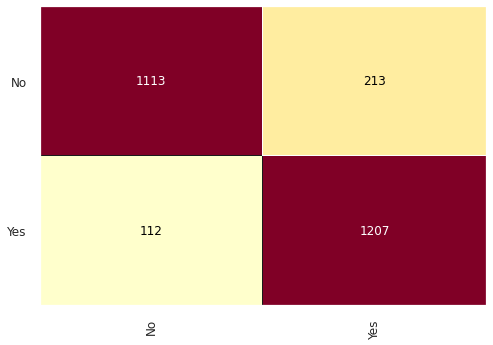

In [ ]:
cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_extra = (classification_report(y_test, previsoes))

In [ ]:
print(classification_extra)

              precision    recall  f1-score   support

          No       0.91      0.84      0.87      1326
         Yes       0.85      0.92      0.88      1319

    accuracy                           0.88      2645
   macro avg       0.88      0.88      0.88      2645
weighted avg       0.88      0.88      0.88      2645



#### Great model, we had a slight worsening in predicting when it is a lead when compared to the random forest model but we gained in predicting when it is not, it is a more balanced model, here we had 88% accuracy.

In [ ]:
score_extra = 0.8827697262479871

#### Checking the most important variables of the model

In [ ]:
feature_extra = pd.Series(extra_trees.feature_importances_, index = columns).sort_values(ascending = False)

In [ ]:
feature_extra

tenure              0.191010
MonthlyCharges      0.174979
Contract            0.103337
PaymentMethod       0.076262
OnlineSecurity      0.045201
gender              0.043993
TechSupport         0.042140
InternetService     0.037083
PaperlessBilling    0.034635
Partner             0.033980
OnlineBackup        0.033963
MultipleLines       0.031938
DeviceProtection    0.031908
Dependents          0.029201
StreamingTV         0.028584
StreamingMovies     0.027694
SeniorCitizen       0.025504
PhoneService        0.008589
dtype: float64

#### K Neighbors

#### Here we will use the K-Neighbors Model, using our Normal Data and StandardScaler Data, here we use the GridSearch Model to figure out the best metrics to use in this model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

#### Here we use the GridSearch to figure out the best metrics to use in this model.

In [ ]:
k_list = list(range(1,10))

In [ ]:
k_values = dict(n_neighbors = k_list)

In [ ]:
grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

#### Normal Data - Grid

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8316299975721625)

#### StandardScaler Data - Grid

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8316299975721625)

#### Running K Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
previsoes = knn.predict(X_test)

#### Normal Data

0.8446124763705104

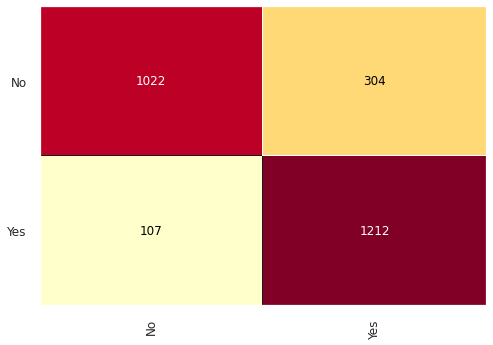

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_knn = (classification_report(y_test, previsoes))

In [ ]:
print(classification_knn)

              precision    recall  f1-score   support

          No       0.91      0.77      0.83      1326
         Yes       0.80      0.92      0.86      1319

    accuracy                           0.84      2645
   macro avg       0.85      0.84      0.84      2645
weighted avg       0.85      0.84      0.84      2645



#### Great model too, here we had approximately 85% accuracy.

In [ ]:
score_knn = 0.8476650563607085

#### StandardScaler

0.8446124763705104

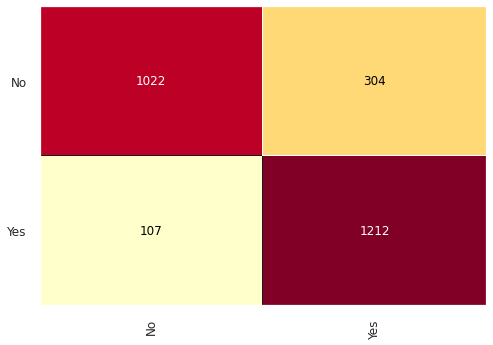

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_knn_scaler = (classification_report(y_test, previsoes))

In [ ]:
print(classification_knn_scaler)

              precision    recall  f1-score   support

          No       0.91      0.77      0.83      1326
         Yes       0.80      0.92      0.86      1319

    accuracy                           0.84      2645
   macro avg       0.85      0.84      0.84      2645
weighted avg       0.85      0.84      0.84      2645



#### When compared to the model using our normal data we had a slight worsening.

In [ ]:
score_knn_scaler = 0.8357487922705314

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression(random_state = 1, max_iter=1000)

In [ ]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [ ]:
previsoes = logistic.predict(X_test)

#### Normal Data

0.7580340264650284

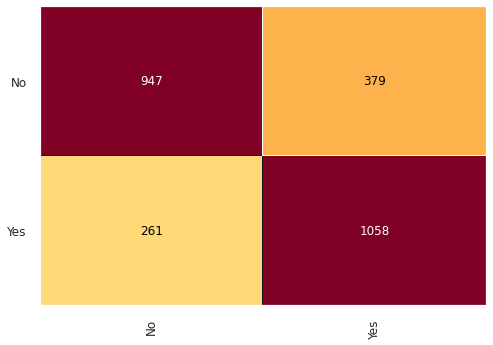

In [ ]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
logistic_normal = (classification_report(y_test, previsoes))

In [ ]:
print(logistic_normal)

              precision    recall  f1-score   support

          No       0.78      0.71      0.75      1326
         Yes       0.74      0.80      0.77      1319

    accuracy                           0.76      2645
   macro avg       0.76      0.76      0.76      2645
weighted avg       0.76      0.76      0.76      2645



#### It's not a bad model but when compared to the others, we have better models.

In [ ]:
logistic_normal = 0.7616747181964574

#### StandardScaler

0.7580340264650284

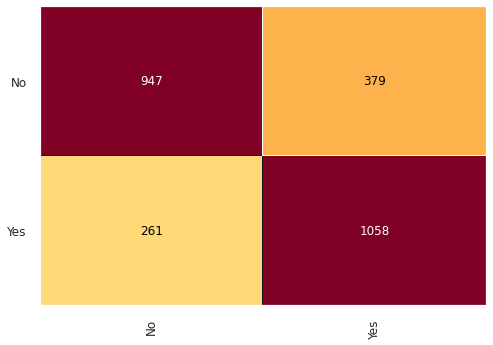

In [ ]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
logistic_scaler = classification_report(y_test, previsoes)

In [ ]:
print(logistic_scaler)

              precision    recall  f1-score   support

          No       0.78      0.71      0.75      1326
         Yes       0.74      0.80      0.77      1319

    accuracy                           0.76      2645
   macro avg       0.76      0.76      0.76      2645
weighted avg       0.76      0.76      0.76      2645



#### When compared to the model using our normal data we had practically the same result.

In [ ]:
logistic_standard = 0.5500465716128108

#### SVM

#### Here we will use the SVM Model, using our Normal Data, StandardScaler Data and MinMax Data, we will test Three Kernels (Linear, RBF and Poly).

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

#### Applying GridSearch

In [ ]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = np.array([3, 4, 5])
polinomio = np.array([2, 3, 4, 5])
gamma = ['auto', 'scale']
values_grid = {'C': c, 'kernel': kernel, 'degree': polinomio, 'gamma': gamma}

In [ ]:
gridSVM = GridSearchCV(estimator = model, param_grid = values_grid, cv = 2, n_jobs = -1)

In [ ]:
gridSVM.fit(X_train, y_train)

#### StandardScaler - Grid

In [ ]:
print('Kernel: ', gridSVM.best_estimator_.kernel)
print('C', gridSVM.best_estimator_.C)
print('Polinomio', gridSVM.best_estimator_.degree)
print('Gamma', gridSVM.best_estimator_.gamma)
print('Score: ', gridSVM.best_score_)

#### Running SVM

In [ ]:
svm = SVC(kernel = 'rbf', gamma = 'auto', random_state = 1, C = 5.0)

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
previsoes = svm.predict(X_test)

#### StandardScaler

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
svm = classification_report(y_test, previsoes)

In [ ]:
print(svm)

#### We had a good result here

In [ ]:
score_svm = 0.7935587761674718

#### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#### Here we will use the AdaBoost Model, using our StandardScaler Data, here we use the GridSearch Model to figure out the best metrics to use in this model.

#### Applying GridSearch

In [ ]:
n_estimators = np.array([500])
learning_rate = np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [ ]:
model = AdaBoostClassifier()

In [ ]:
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 3, n_jobs = -1)

In [ ]:
gridAdaBoost.fit(X_train, y_train)

#### StandardScaler - Grid

In [ ]:
print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

#### Running AdaBoost

In [ ]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.9, random_state = 0)

In [ ]:
ada_boost.fit(X_train, y_train)

In [ ]:
previsoes = ada_boost.predict(X_test)

#### StandardScaler

In [ ]:
cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_ada_scaler = (classification_report(y_test, previsoes))

In [ ]:
print(classification_ada_scaler)

#### It's a good model but when compared to others it didn't have a good result.

In [ ]:
score_ada_scaler = 0.7648953301127214

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#### Here we will use the Gradient Boosting Model, using our StandardScaler Data, here we use the GridSearch Model to figure out the best metrics to use in this model.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
n_estimators = np.array([300])
learning_rate = np.array([0.01, 0.009, 0.008, 0.007, 0.011, 0.012, 0.013, 0.02, 0.005])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
gridGradient = GridSearchCV(estimator = model, param_grid = values_grid, cv = 3, n_jobs = -1)

In [ ]:
gridGradient.fit(X_train, y_train)

#### StandardScaler Data - Grid

In [ ]:
print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

#### Running GradientBoosting

In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.02, random_state = 0)

In [ ]:
grad_boost.fit(X_train, y_train)

In [ ]:
previsoes = grad_boost.predict(X_test)

#### StandardScaler

In [ ]:
cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_grad_standard = (classification_report(y_test, previsoes))

In [ ]:
print(classification_grad_standard)

#### It's a good model but when compared to others it didn't have a good result.

In [ ]:
score_grad_standard = 0.7719806763285024

#### Using CHI2 to check the most important variables.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

In [ ]:
featureScores.sort_values(by = 'Chi Squared Score', ascending = False)

#### Checking the results

In [ ]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

In [ ]:
resumo = pd.DataFrame({'Naive_dict_v1':pd.Series(Naive_dict_v1),
                      })

In [ ]:
Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':gridDecisionTree.best_estimator_.criterion,
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':gridRandomForest.best_estimator_.criterion,
               'Precision':score_random}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type':gridExtraTrees.best_estimator_.criterion,
               'Precision':score_extra}

In [ ]:
resumo_random = pd.DataFrame({'Decision_dict':pd.Series(Decision_dict),
                        'Random_dict':pd.Series(Random_dict),
                        'Extra Tree':pd.Series(Extra_dict)
                      })

In [ ]:
KNN_dict_v1 = {'Model':'KNN',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':score_knn}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':score_knn_scaler}

In [ ]:
resumo_knn = pd.DataFrame({'KNN_dict_v1':pd.Series(KNN_dict_v1),
                       'KNN_dict_v2':pd.Series(KNN_dict_v2)
                      })

In [ ]:
Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

Logistic_dict_v2 = {'Model':'Logistic Regression',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':logistic_standard}

In [ ]:
resumo_logistic = pd.DataFrame({'Logistic_dict_v1':pd.Series(Logistic_dict_v1),
                       'Logistic_dict_v2':pd.Series(Logistic_dict_v2),
                      })

In [ ]:
svm_dict_v1 = {'Model':'SVM',
               'Scaling':'Standard',
               'Type':gridSVM.best_estimator_.kernel,
               'Precision':score_svm}

In [ ]:
resumo_svm = pd.DataFrame({'svm_dict_v1':pd.Series(svm_dict_v1)
                      })

In [ ]:
ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':gridSVM.best_estimator_.kernel,
               'Precision':score_ada_scaler}

In [ ]:
resumo_ada = pd.DataFrame({'ada_dict_v1':pd.Series(ada_dict_v1)
                      })

In [ ]:
resumo

In [ ]:
resumo_random

In [ ]:
resumo_knn

In [ ]:
resumo_logistic

In [ ]:
resumo_svm

In [ ]:
resumo_ada

#### Looking the Principle Variables

#### Chi-2

In [ ]:
featureScores.sort_values(by = 'Chi Squared Score', ascending = False)

#### Extra Trees

In [ ]:
feature_extra

#### Random Forest

In [ ]:
feature_imp_random

#### Decision Tree

In [ ]:
feature_imp